In [89]:
# Kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("pastel")

# Veri Yükleme
df = pd.read_csv("supermarket_sales.csv")

# Tarih ve saat formatı düzenleme
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")
df["Hour"] = pd.to_datetime(df["Time"], format="%H:%M").dt.hour
df["Weekday"] = df["Date"].dt.day_name()



In [90]:
df.shape

(1000, 20)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

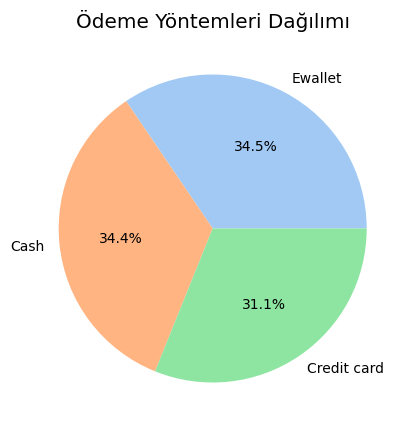

In [80]:
# 1. Ödeme Yöntemleri
# =======================
plt.figure(figsize=(5,5))
df["Payment"].value_counts().plot(kind="pie", autopct="%.1f%%", ylabel="")
plt.title("Ödeme Yöntemleri Dağılımı")
plt.savefig("figures/odeme_yontemleri.png", dpi=200, bbox_inches="tight")
plt.show()

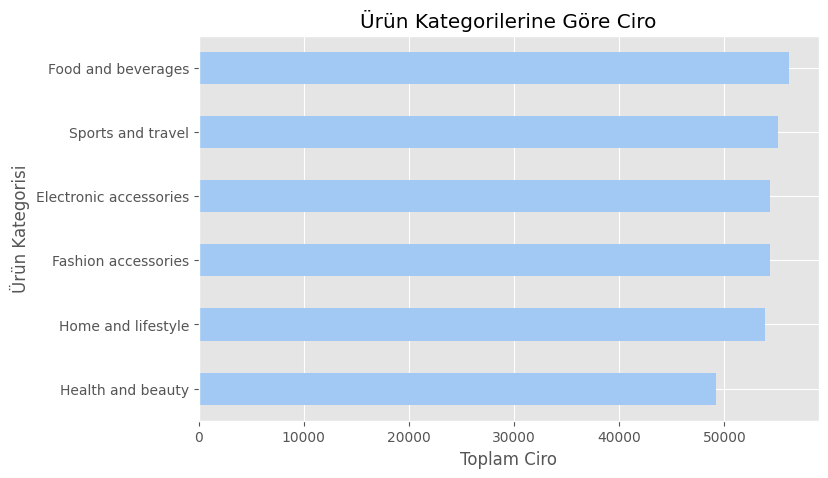

In [81]:
# =======================
# 2. Ürün Kategorilerine Göre Ciro
# =======================
plt.figure(figsize=(8,5))
df.groupby("Product line")["Total"].sum().sort_values().plot(kind="barh")
plt.title("Ürün Kategorilerine Göre Ciro")
plt.xlabel("Toplam Ciro"); plt.ylabel("Ürün Kategorisi")
plt.savefig("figures/urun_kategorisi_ciro.png", dpi=200, bbox_inches="tight")
plt.show()


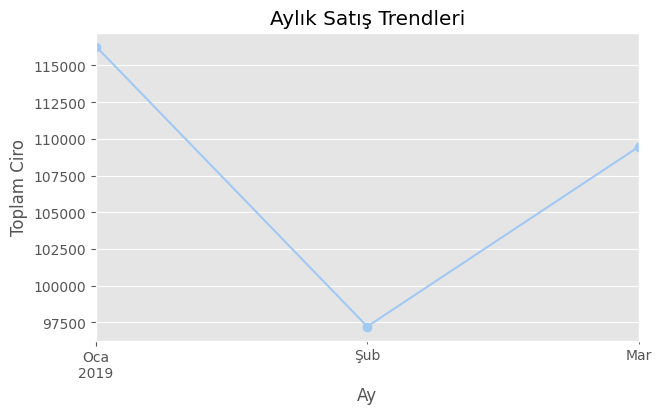

In [82]:
# =======================
# 3. Aylık Satış Trendleri
# =======================
plt.figure(figsize=(7,4))
df.groupby("Month")["Total"].sum().plot(marker="o")
plt.title("Aylık Satış Trendleri")
plt.xlabel("Ay"); plt.ylabel("Toplam Ciro")
plt.savefig("figures/aylik_trend.png", dpi=200, bbox_inches="tight")
plt.show()

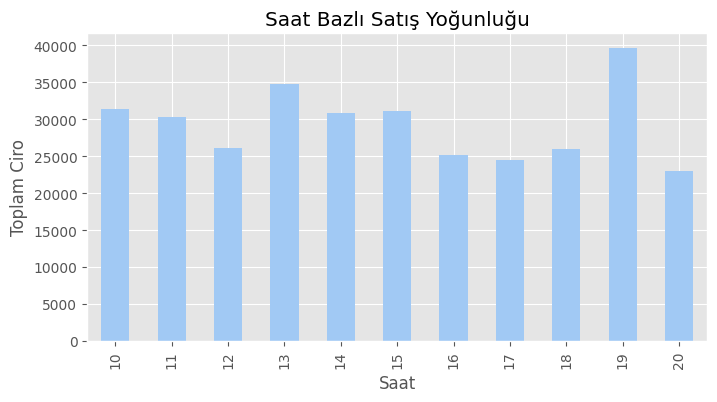

In [83]:
# =======================
# 4. Saat Bazlı Satış Yoğunluğu
# =======================
plt.figure(figsize=(8,4))
df.groupby("Hour")["Total"].sum().plot(kind="bar")
plt.title("Saat Bazlı Satış Yoğunluğu")
plt.xlabel("Saat"); plt.ylabel("Toplam Ciro")
plt.savefig("figures/saat_bazli.png", dpi=200, bbox_inches="tight")
plt.show()

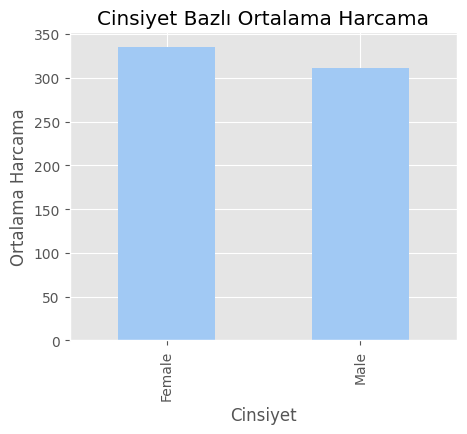

In [84]:
# =======================
# 5. Cinsiyet Bazlı Ortalama Harcama
# =======================
plt.figure(figsize=(5,4))
df.groupby("Gender")["Total"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Cinsiyet Bazlı Ortalama Harcama")
plt.xlabel("Cinsiyet"); plt.ylabel("Ortalama Harcama")
plt.savefig("figures/cinsiyet_harcama.png", dpi=200, bbox_inches="tight")
plt.show()


In [85]:
df.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019-01,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019-03,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019-03,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019-01,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019-02,10,Friday


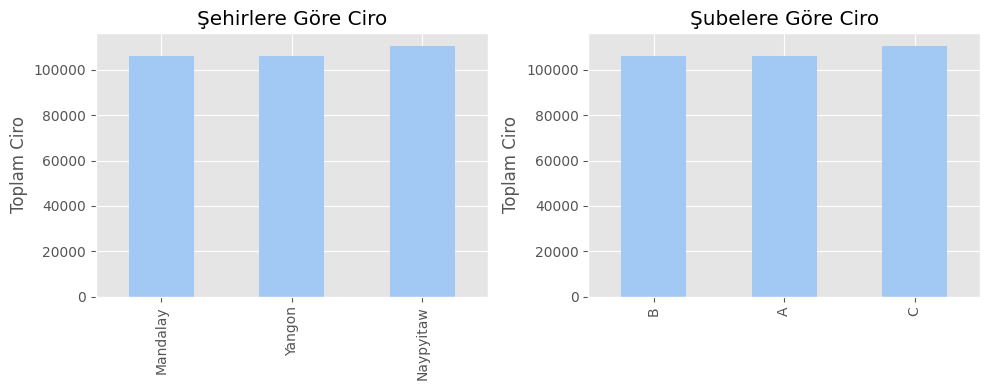

In [86]:

# =======================
# 6. Şehir ve Şube Karşılaştırması
# =======================
fig, axes = plt.subplots(1,2, figsize=(10,4))
df.groupby("City")["Total"].sum().sort_values().plot(kind="bar", ax=axes[0], title="Şehirlere Göre Ciro")
df.groupby("Branch")["Total"].sum().sort_values().plot(kind="bar", ax=axes[1], title="Şubelere Göre Ciro")
for ax in axes:
    ax.set_xlabel(""); ax.set_ylabel("Toplam Ciro")
plt.tight_layout()
plt.savefig("figures/sehir_sube.png", dpi=200, bbox_inches="tight")
plt.show()



C:\Users\htume\AppData\Local\Temp\ipykernel_20740\2331458780.py:14: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\htume\AppData\Local\Temp\ipykernel_20740\2331458780.py:15: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  plt.savefig("figures/isi_haritasi.png", dpi=200, bbox_inches="tight")
C:\Users\htume\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128722 (\N{SHOPPING TROLLEY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


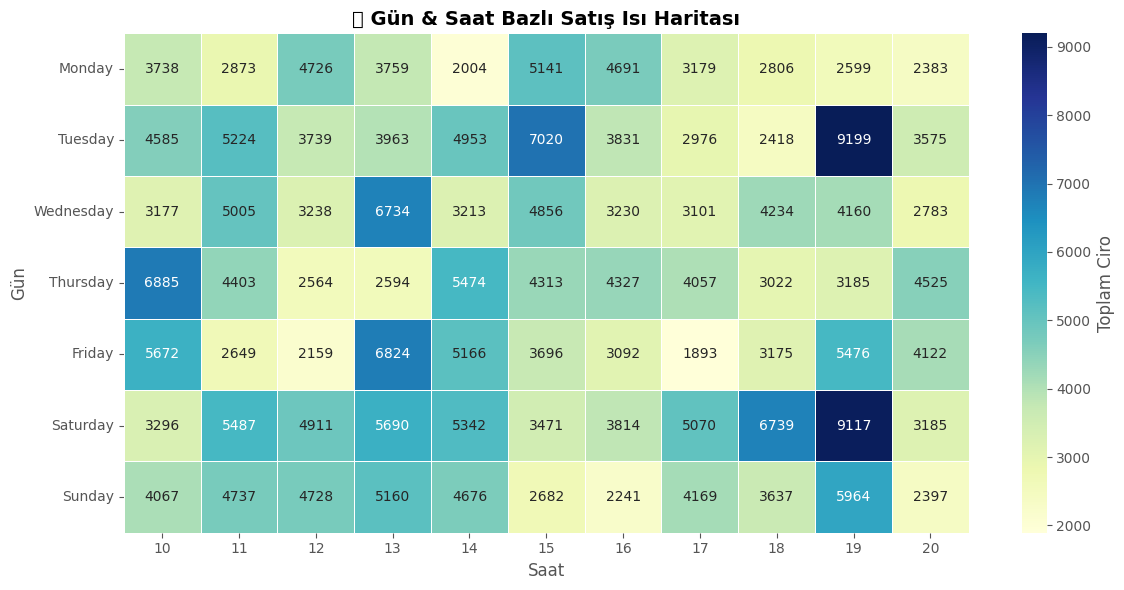

In [87]:
# =======================
# 7. Gün & Saat Bazlı Isı Haritası
# =======================
pivot = pd.pivot_table(df, index="Weekday", columns="Hour",
                       values="Total", aggfunc="sum").fillna(0)
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
pivot = pivot.reindex(order)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5,
            cbar_kws={"label":"Toplam Ciro"})
plt.title("🛒 Gün & Saat Bazlı Satış Isı Haritası", fontsize=14, fontweight="bold")
plt.xlabel("Saat"); plt.ylabel("Gün")
plt.tight_layout()
plt.savefig("figures/isi_haritasi.png", dpi=200, bbox_inches="tight")
plt.show()


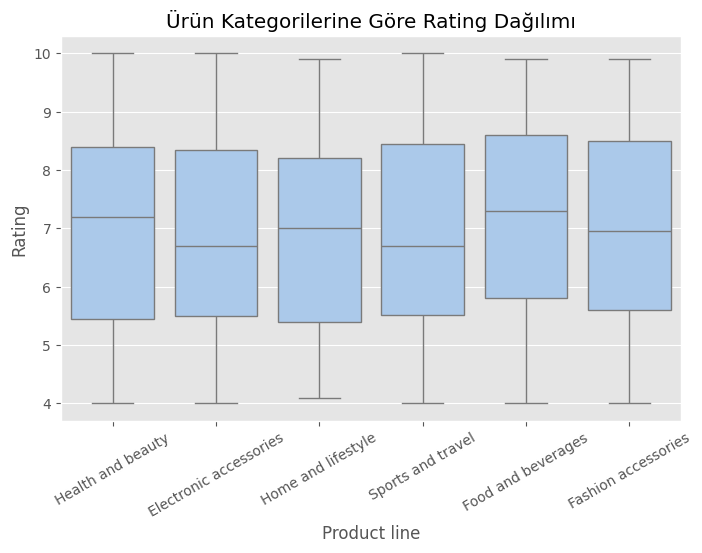

In [88]:

# =======================
# 8. Rating Analizi
# =======================
plt.figure(figsize=(8,5))
sns.boxplot(x="Product line", y="Rating", data=df)
plt.title("Ürün Kategorilerine Göre Rating Dağılımı")
plt.xticks(rotation=30)
plt.savefig("figures/rating_boxplot.png", dpi=200, bbox_inches="tight")
plt.show()